# Purpose

Of this notebook is to demonstrate some common usages of the `kulgap` package.

### Define a Collection

A collection is essentially is list of all of your timeseries data structured like:

In [1]:
import numpy as np

# import some data
control_obs_times = np.array([0, 4, 7, 11, 14, 18, 21])
control_obs_seqs = np.array(
    [
        [186.98, 368.7, 488.45, 782.15, 924.55, 970.16, 1081.03],
        [267.6, 495.77, 628.39, 892.86, 984.88, 1096.8, 1314.03],
        [164.48, 265.19, 321.11, 429.37, 554.81, 602.29, 801.5],
        [201.21, 363.26, 443.48,660, 860.98, 961.62, 1005.79]
    ]
)

treatment_obs_times = np.array([0, 4, 7, 11, 14, 18, 21])
treatment_obs_seqs = np.array(
    [
        [118.82, 296.3, 465.59, 600.2, 482.71, 613.6, 408.73],
        [151.67, 264.68, 384.61, 370.35, 304.5, 311.43, 213.42],
        [127.3, 211.11, 270.17, 166.8, 87.16, 72.28, 54.18]
    ]
)

`control_obs_times` is the sequence of times at which measurements were taken for the control case. `control_obs_seqs` is the sequence**s** of the actual measurements taken at each individual time.

In [2]:
from kulgap.collection import Collection

control_collection = Collection("control", control_obs_times, control_obs_seqs)
treatment_collection = Collection("treatment", treatment_obs_times, treatment_obs_seqs)

INFO:kulgap.config:Normalizing data...
INFO:kulgap.config:Normalizing data...


### Calculate Metrics for the Collection

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

These are the supported metric types:

In [4]:
from kulgap.metrics import Metrics
Metrics.TYPES

('KL_DIVERGENCE',
 'KL_P_VALUE',
 'MRECIST',
 'MRECIST_COUNTS',
 'ANGLE',
 'ANGLE_RELATIVE',
 'ANGLE_AVERAGE',
 'ANGLE_AVERAGE_RELATIVE',
 'AUC',
 'AUC_NORM',
 'AUC_GP',
 'DIRECTION',
 'CREDIBLE_INTERVALS',
 'PERCENT_CREDIBLE_INTERVALS',
 'RATES_LIST',
 'DELTA_LOG_LIKELIHOOD_H0_H1')

You need to pass into the Metrics the Collection on which you'd like to perform analysis on, and you're ready to calculate the metrics.

In [5]:
control_metrics = Metrics(collection=control_collection)
treatment_metrics = Metrics(collection=treatment_collection)

### KL Divergence

The main supported distance metric between two Gaussian processes.

In [6]:
treatment_metrics.kl_divergence(control_metrics)

INFO:kulgap.config:Currently no fit GP on treatment, fitting a GP
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 24.679507527412888
Optimization restart 2/7, f = 32.57611537624202
Optimization restart 3/7, f = 24.679507527126788
Optimization restart 4/7, f = 24.679507527204464
Optimization restart 5/7, f = 24.679507527518503


INFO:kulgap.config:Currently no fit GP on control, fitting a GP
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 6/7, f = 24.679507527138348
Optimization restart 7/7, f = 24.679507527603718
Optimization restart 1/7, f = -9.145489191420284
Optimization restart 2/7, f = -9.145489191512223
Optimization restart 3/7, f = -9.145489191513194


INFO:kulgap.config:Calculating the KL Divergence between treatment and control
INFO:kulgap.config:Calculated KL divergence is: 28.260228


Optimization restart 4/7, f = 6.877801178671442
Optimization restart 5/7, f = 6.8778011786519855
Optimization restart 6/7, f = 6.8778011786632725
Optimization restart 7/7, f = -9.145489191512475


28.260228481619485

 /usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


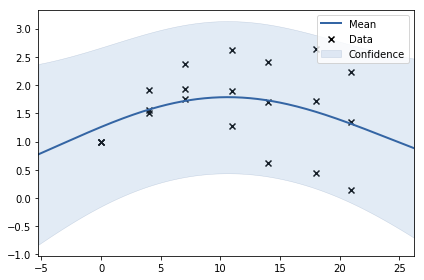

In [7]:
treatment_metrics.fit_gp.plot()

In [8]:
control_metrics.kl_divergence(treatment_metrics)

INFO:kulgap.config:Calculating the KL Divergence between control and treatment
INFO:kulgap.config:Calculated KL divergence is: 468.151062


468.15106181523396

Of course, KL divergence is not symmetric.

 /usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


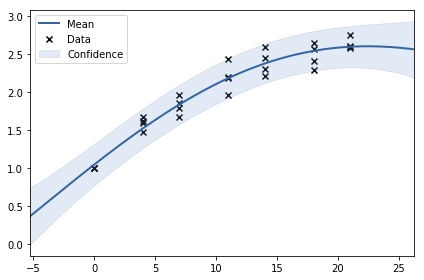

In [9]:
control_metrics.fit_gp.plot()

### Jensen Shannon Divergence

The symmetric version of KL divergence.

### P value for the observed KL divergence

In [10]:
treatment_metrics.kl_p_value(control_metrics)

INFO:kulgap.config:Processed 0 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 32.583690003298415
Optimization restart 2/7, f = 32.58369000333201
Optimization restart 3/7, f = 41.7060224829149
Optimization restart 4/7, f = 32.5836900044735
Optimization restart 5/7, f = 32.5836900032897
Optimization restart 6/7, f = 41.70602248291349
Optimization restart 7/7, f = 32.5836900038933
Optimization restart 1/7, f = -10.19285217255836
Optimization restart 2/7, f = 5.931897945302767
Optimization restart 3/7, f = 5.931897945302911
Optimization restart 4/7, f = -10.192852184317982


 /Users/wonjunetai/src/github.com/kulgap/kulgap/metrics.py:151: RuntimeWarning:invalid value encountered in log10
 /usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
INFO:kulgap.config:Processed 1 out of 70 cases


Optimization restart 5/7, f = 5.931897944933025
Optimization restart 6/7, f = -10.192852184317188
Optimization restart 7/7, f = -10.192852184199166


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 31.146051935023184
Optimization restart 2/7, f = 31.14605193475651
Optimization restart 3/7, f = 40.34497430241122
Optimization restart 4/7, f = 31.14605194769628
Optimization restart 5/7, f = 31.146051934825103
Optimization restart 6/7, f = 31.14605193476109


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 40.3449802070087
Optimization restart 1/7, f = -3.057560892774175
Optimization restart 2/7, f = -3.057560898676302
Optimization restart 3/7, f = -3.0575608986799256
Optimization restart 4/7, f = 12.63585686842206
Optimization restart 5/7, f = 12.635856867922204
Optimization restart 6/7, f = -3.0575608985938434
Optimization restart 7/7, f = 12.635856868338037


INFO:kulgap.config:Processed 2 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 30.715772533242173
Optimization restart 2/7, f = 30.715772533284998
Optimization restart 3/7, f = 40.008003196083706
Optimization restart 4/7, f = 30.715772533240333
Optimization restart 5/7, f = 40.00800319607781


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 6/7, f = 30.71577254668352
Optimization restart 7/7, f = 30.715772533223223
Optimization restart 1/7, f = -9.284332883571418
Optimization restart 2/7, f = -9.284332883642827
Optimization restart 3/7, f = 6.903400259959124
Optimization restart 4/7, f = -9.284332883606702
Optimization restart 5/7, f = -9.284332883682573

INFO:kulgap.config:Processed 3 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



Optimization restart 6/7, f = 6.903400259973175
Optimization restart 7/7, f = -9.284332883702245
Optimization restart 1/7, f = 31.603501663839275
Optimization restart 2/7, f = 31.603501654730028
Optimization restart 3/7, f = 31.6035016553641
Optimization restart 4/7, f = 40.83412190899216
Optimization restart 5/7, f = 40.834121930732735
Optimization restart 6/7, f = 31.60350165458664


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 31.603501657667827
Optimization restart 1/7, f = -2.5299521373096443
Optimization restart 2/7, f = -2.529952137307019
Optimization restart 3/7, f = 12.711477282781628
Optimization restart 4/7, f = 12.711477282544115
Optimization restart 5/7, f = -2.529952137321125
Optimization restart 6/7, f = 12.71147728278434
Optimization restart 7/7, f = -2.5299521373198584


INFO:kulgap.config:Processed 4 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 15.652420615779914
Optimization restart 2/7, f = 15.652420615828103
Optimization restart 3/7, f = 15.652420619647991
Optimization restart 4/7, f = 15.652420615792636
Optimization restart 5/7, f = 15.652420633375122


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 6/7, f = 15.652420615762033
Optimization restart 7/7, f = 15.652420617402
Optimization restart 1/7, f = 25.412401326574646
Optimization restart 2/7, f = 25.412401326575143
Optimization restart 3/7, f = 25.412401326647878
Optimization restart 4/7, f = 25.412401326850564
Optimization restart 5/7, f = 34.16374256088086
Optimization restart 6/7, f = 34.163742577483546
Optimization restart 7/7, f = 34.163742577495796


INFO:kulgap.config:Processed 5 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 16.246128171567644
Optimization restart 2/7, f = 28.808347397850262
Optimization restart 3/7, f = 16.24612817355907
Optimization restart 4/7, f = 28.8083495793652
Optimization restart 5/7, f = 16.24612817157472
Optimization restart 6/7, f = 28.808349295512144
Optimization restart 7/7, f = 16.246128171537862
Optimization restart 1/7, f = 25.928570871592044
Optimization restart 2/7, f = 25.92857087129008
Optimization restart 3/7, f = 25.928570871644936
Optimization restart 4/7, f = 25.928570871147897
Optimization restart 5/7, f = 25.928570871141716
Optimization restart 6/7, f = 25.928570871564233
Optimization restart 7/7, f = 25.92857087113845

INFO:kulgap.config:Processed 6 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



Optimization restart 1/7, f = 16.00454096923107
Optimization restart 2/7, f = 28.634085823987444
Optimization restart 3/7, f = 16.0045409711717
Optimization restart 4/7, f = 16.00454096923116
Optimization restart 5/7, f = 16.004541017128073


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 6/7, f = 16.004540969290602
Optimization restart 7/7, f = 28.6340858133791
Optimization restart 1/7, f = 24.982910518069993
Optimization restart 2/7, f = 33.78366740217788
Optimization restart 3/7, f = 24.982910516263985
Optimization restart 4/7, f = 33.78366740218159
Optimization restart 5/7, f = 33.78366508506517
Optimization restart 6/7, f = 33.78366740220295
Optimization restart 7/7, f = 24.982910516395812


INFO:kulgap.config:Processed 7 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 14.21621843844211
Optimization restart 2/7, f = 14.216218438657366
Optimization restart 3/7, f = 14.216218438502363
Optimization restart 4/7, f = 26.89425304123099
Optimization restart 5/7, f = 26.894253223583465
Optimization restart 6/7, f = 26.89425322346038
Optimization restart 7/7, f = 14.21621843853142


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 27.160118289334783
Optimization restart 2/7, f = 35.62184406430913
Optimization restart 3/7, f = 27.16011830009205
Optimization restart 4/7, f = 35.62184405667802
Optimization restart 5/7, f = 27.160118289482167
Optimization restart 6/7, f = 35.621844064309116
Optimization restart 7/7, f = 27.16011828921144


INFO:kulgap.config:Processed 8 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 14.408355454344449
Optimization restart 2/7, f = 27.1113499941713
Optimization restart 3/7, f = 14.408355454691652
Optimization restart 4/7, f = 27.111349966817613
Optimization restart 5/7, f = 14.408355454001844
Optimization restart 6/7, f = 27.111349240726916


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 14.408355454025799
Optimization restart 1/7, f = 26.427504197529565
Optimization restart 2/7, f = 26.427504197304835
Optimization restart 3/7, f = 34.99467083093303
Optimization restart 4/7, f = 26.427504197162634
Optimization restart 5/7, f = 26.427504206506455
Optimization restart 6/7, f = 26.427504197254777
Optimization restart 7/7, f = 26.427504197296148


INFO:kulgap.config:Processed 9 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 14.788928386464686
Optimization restart 2/7, f = 14.788928386457714
Optimization restart 3/7, f = 14.788928386460785
Optimization restart 4/7, f = 27.56052612033308
Optimization restart 5/7, f = 27.56052741796631


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 6/7, f = 14.788928386463343
Optimization restart 7/7, f = 27.560527417964106
Optimization restart 1/7, f = 26.842848645541718
Optimization restart 2/7, f = 26.84284864557003
Optimization restart 3/7, f = 35.32930503264055
Optimization restart 4/7, f = 26.842848645685372
Optimization restart 5/7, f = 26.842848645534367
Optimization restart 6/7, f = 35.32930476856319
Optimization restart 7/7, f = 26.84284864602725


INFO:kulgap.config:Processed 10 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
 /usr/local/lib/python3.6/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /usr/local/lib/python3.6/site-packages/GPy/kern/src/rbf.py:54: RuntimeWarning:invalid value encountered in multiply


Optimization restart 1/7, f = 33.48205899658167
Optimization restart 2/7, f = 33.280236265676436
Optimization restart 3/7, f = 42.79329788238666
Optimization restart 4/7, f = 33.28023626592814
Optimization restart 5/7, f = 42.793297882386675
Optimization restart 6/7, f = 42.79329789832673


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 33.28023626564375
Optimization restart 1/7, f = 11.19305976719702
Optimization restart 2/7, f = 23.74466963017605
Optimization restart 3/7, f = 11.193059767181442
Optimization restart 4/7, f = 11.193059767791498
Optimization restart 5/7, f = 23.744669648284987


INFO:kulgap.config:Processed 11 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 6/7, f = 11.193059767204591
Optimization restart 7/7, f = 11.19305976719296
Optimization restart 1/7, f = 33.09660331263393
Optimization restart 2/7, f = 42.6613624035719
Optimization restart 3/7, f = 33.09660331259956


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 4/7, f = 42.661362404470985
Optimization restart 5/7, f = 33.096603312585785
Optimization restart 6/7, f = 33.09660331291418
Optimization restart 7/7, f = 42.661346179390634
Optimization restart 1/7, f = 11.653591580694147
Optimization restart 2/7, f = 11.653591580636693
Optimization restart 3/7, f = 11.653591580637052

INFO:kulgap.config:Processed 12 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



Optimization restart 4/7, f = 24.052296402362096
Optimization restart 5/7, f = 24.052297108963028
Optimization restart 6/7, f = 24.052295944410844
Optimization restart 7/7, f = 11.6535915806428
Optimization restart 1/7, f = 33.53450418828417
Optimization restart 2/7, f = 33.534504188581934


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 3/7, f = 43.083986659825854
Optimization restart 4/7, f = 43.083974462718565
Optimization restart 5/7, f = 43.08398665982916
Optimization restart 6/7, f = 43.083986652053426
Optimization restart 7/7, f = 43.08398663599523
Optimization restart 1/7, f = 10.350868309738921
Optimization restart 2/7, f = 22.934603129586975
Optimization restart 3/7, f = 22.934603129724977
Optimization restart 4/7, f = 10.350868309966598

INFO:kulgap.config:Processed 13 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



Optimization restart 5/7, f = 10.35086830938852
Optimization restart 6/7, f = 10.350868309489673
Optimization restart 7/7, f = 22.934603129634755
Optimization restart 1/7, f = 31.97883101765346
Optimization restart 2/7, f = 31.978831013514625
Optimization restart 3/7, f = 41.61559128012289
Optimization restart 4/7, f = 31.978831013707904
Optimization restart 5/7, f = 41.61559127977219
Optimization restart 6/7, f = 31.978831013836732
Optimization restart 7/7, f = 31.978831014919496


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 13.950601448952098
Optimization restart 2/7, f = 14.585487263742472
Optimization restart 3/7, f = 25.97993675214438
Optimization restart 4/7, f = 13.950601448963068
Optimization restart 5/7, f = 25.979936757279695
Optimization restart 6/7, f = 25.979936757279454
Optimization restart 7/7, f = 13.950601450128408


INFO:kulgap.config:Processed 14 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 32.560127195498126
Optimization restart 2/7, f = 42.16354731642082
Optimization restart 3/7, f = 32.56012719550362
Optimization restart 4/7, f = 32.5601271994574


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 5/7, f = 32.56012719668969
Optimization restart 6/7, f = 42.16354732272152
Optimization restart 7/7, f = 32.56012719551496
Optimization restart 1/7, f = 13.44641909672206
Optimization restart 2/7, f = 25.52139603654505
Optimization restart 3/7, f = 25.521396036905728

INFO:kulgap.config:Processed 15 out of 70 cases



Optimization restart 4/7, f = 13.446419096177937
Optimization restart 5/7, f = 13.44641909639086
Optimization restart 6/7, f = 25.52139602190164
Optimization restart 7/7, f = 13.44641909617783


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 32.30145234435734
Optimization restart 2/7, f = 41.969308557737236
Optimization restart 3/7, f = 32.30145234466504
Optimization restart 4/7, f = 41.96930855773124
Optimization restart 5/7, f = 32.30145234438225
Optimization restart 6/7, f = 41.96930643876139
Optimization restart 7/7, f = 41.96930821210877
Optimization restart 1/7, f = 13.527199866675502
Optimization restart 2/7, f = 13.527199873399432
Optimization restart 3/7, f = 13.527199866809351
Optimization restart 4/7, f = 25.534090610328544
Optimization restart 5/7, f = 13.527199866681904
Optimization restart 6/7, f = 25.534090610342787
Optimization restart 7/7, f = 13.527199866701302


INFO:kulgap.config:Processed 16 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 2.273991066046939
Optimization restart 2/7, f = 2.273991066051517
Optimization restart 3/7, f = 2.2739910660469516
Optimization restart 4/7, f = 2.273991066048163
Optimization restart 5/7, f = 16.970421094117604
Optimization restart 6/7, f = 16.970421052522354


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 16.97041630554756
Optimization restart 1/7, f = 24.0104511155673
Optimization restart 2/7, f = 23.630753467811083


INFO:kulgap.config:Processed 17 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 3/7, f = 23.630787069651216
Optimization restart 4/7, f = 24.010451115542637
Optimization restart 5/7, f = 32.32694424432538
Optimization restart 6/7, f = 32.32694424432361
Optimization restart 7/7, f = 24.010451118332725
Optimization restart 1/7, f = 26.59514219357622


 /usr/local/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 2/7, f = -2.2978904460261482
Optimization restart 3/7, f = -2.297890446033559
Optimization restart 4/7, f = -2.297890446030081
Optimization restart 5/7, f = -2.2978904460335148


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 6/7, f = -2.297890446028614
Optimization restart 7/7, f = 12.955369563906949
Optimization restart 1/7, f = 22.059705770590064
Optimization restart 2/7, f = 22.05969945682621


INFO:kulgap.config:Processed 18 out of 70 cases


Optimization restart 3/7, f = 22.05978283603266
Optimization restart 4/7, f = 22.059708917579805
Optimization restart 5/7, f = 31.041079067592158
Optimization restart 6/7, f = 22.059972402126704
Optimization restart 7/7, f = 22.059699817354463


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 26.820949510245285
Optimization restart 2/7, f = 17.118120848670536
Optimization restart 3/7, f = 17.118120848673847
Optimization restart 4/7, f = 2.07425077997995
Optimization restart 5/7, f = 17.118120848668905
Optimization restart 6/7, f = 2.074250779812145


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 2.0742507798734895
Optimization restart 1/7, f = 23.403781967704322
Optimization restart 2/7, f = 23.011628342247874
Optimization restart 3/7, f = 23.40378196823839
Optimization restart 4/7, f = 23.011391040773432
Optimization restart 5/7, f = 23.403781968280974


INFO:kulgap.config:Processed 19 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 6/7, f = 31.736372983178292
Optimization restart 7/7, f = 23.011412356589503
Optimization restart 1/7, f = 25.618796116023276
Optimization restart 2/7, f = 0.590392478593607
Optimization restart 3/7, f = 15.604830084799108
Optimization restart 4/7, f = 0.5903924787720101
Optimization restart 5/7, f = 0.5903924786357937
Optimization restart 6/7, f = 0.5903924785887682


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 0.5903924785889423
Optimization restart 1/7, f = 25.35550260321517
Optimization restart 2/7, f = 33.45321764481073
Optimization restart 3/7, f = 33.45321764485131
Optimization restart 4/7, f = 33.45321764480233
Optimization restart 5/7, f = 25.355502601933694


INFO:kulgap.config:Processed 20 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 6/7, f = 25.35550260215991
Optimization restart 7/7, f = 25.355502601942554
Optimization restart 1/7, f = 31.590455152199926
Optimization restart 2/7, f = 31.590455152238167


 /usr/local/lib/python3.6/site-packages/GPy/kern/src/rbf.py:51: RuntimeWarning:overflow encountered in square
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 3/7, f = 31.590455152162654
Optimization restart 4/7, f = 31.590455152190756
Optimization restart 5/7, f = 31.590455152742265
Optimization restart 6/7, f = 31.59045515216409
Optimization restart 7/7, f = 31.590455152232018
Optimization restart 1/7, f = 4.50667826042654
Optimization restart 2/7, f = 18.658045027456936
Optimization restart 3/7, f = 18.658045027447855
Optimization restart 4/7, f = 18.65804502745259
Optimization restart 5/7, f = 18.65804502745258
Optimization restart 6/7, f = 18.65804502683612
Optimization restart 7/7, f = 4.506678260299726


INFO:kulgap.config:Processed 21 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 31.103071809975717
Optimization restart 2/7, f = 31.103071809296218
Optimization restart 3/7, f = 31.103071809287485


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 4/7, f = 31.103071809471004
Optimization restart 5/7, f = 31.10307180928152
Optimization restart 6/7, f = 31.103071810185853
Optimization restart 7/7, f = 31.103071809666638
Optimization restart 1/7, f = 1.3680555027128207
Optimization restart 2/7, f = 15.758336211208846
Optimization restart 3/7, f = 15.758336186839204
Optimization restart 4/7, f = 1.3680555027120889
Optimization restart 5/7, f = 1.3680555027118775
Optimization restart 6/7, f = 15.758336211179442
Optimization restart 7/7, f = 15.758336209379827


INFO:kulgap.config:Processed 22 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 31.997859371058272
Optimization restart 2/7, f = 31.997859370279784
Optimization restart 3/7, f = 31.997859375140667
Optimization restart 4/7, f = 31.99785937026529


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 5/7, f = 31.997859370270312
Optimization restart 6/7, f = 41.45686061030566
Optimization restart 7/7, f = 31.99785937027972
Optimization restart 1/7, f = 4.347971944869727
Optimization restart 2/7, f = 4.347971944865979
Optimization restart 3/7, f = 18.21278832050413
Optimization restart 4/7, f = 4.34797194495264
Optimization restart 5/7, f = 18.212788316622238
Optimization restart 6/7, f = 18.212788139468074
Optimization restart 7/7, f = 4.347971945399092


INFO:kulgap.config:Processed 23 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 29.279787166338934
Optimization restart 2/7, f = 29.279787164230203
Optimization restart 3/7, f = 38.986776433882845
Optimization restart 4/7, f = 38.986776290902114
Optimization restart 5/7, f = 38.98677643388021
Optimization restart 6/7, f = 29.27978716421301


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 29.279787164213882
Optimization restart 1/7, f = 0.9710370924169798
Optimization restart 2/7, f = 0.971037092414262
Optimization restart 3/7, f = 0.9710370924283716
Optimization restart 4/7, f = 15.684294123782937
Optimization restart 5/7, f = 0.9710370924168785
Optimization restart 6/7, f = 0.9710370924138498
Optimization restart 7/7, f = 15.684294154105768


INFO:kulgap.config:Processed 24 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 30.415675728097558
Optimization restart 2/7, f = 40.014258464608815
Optimization restart 3/7, f = 40.014258464605476
Optimization restart 4/7, f = 30.41567572777873
Optimization restart 5/7, f = 30.415675727392067
Optimization restart 6/7, f = 40.01425846457142


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 30.415675727417664
Optimization restart 1/7, f = 5.550912144671708
Optimization restart 2/7, f = 19.454167066731223
Optimization restart 3/7, f = 19.454167066745548
Optimization restart 4/7, f = 19.45416706670968
Optimization restart 5/7, f = 19.454166644100113
Optimization restart 6/7, f = 5.550912144569455
Optimization restart 7/7, f = 5.550912144573532


INFO:kulgap.config:Processed 25 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 29.809935429852615
Optimization restart 2/7, f = 29.80993542893541
Optimization restart 3/7, f = 29.809935428934956
Optimization restart 4/7, f = 39.529420674319454


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 5/7, f = 29.80993542897246
Optimization restart 6/7, f = 29.80993542918728
Optimization restart 7/7, f = 39.529420704855184
Optimization restart 1/7, f = 1.578806926809822
Optimization restart 2/7, f = 1.5788069268305627
Optimization restart 3/7, f = 1.5788069268100635
Optimization restart 4/7, f = 1.5788069268206293
Optimization restart 5/7, f = 1.578806926807312
Optimization restart 6/7, f = 15.798410044392831
Optimization restart 7/7, f = 1.5788069268072285


INFO:kulgap.config:Processed 26 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 13.415989278716696
Optimization restart 2/7, f = 13.415989278386451
Optimization restart 3/7, f = 13.415989278294406
Optimization restart 4/7, f = 26.647415994129013
Optimization restart 5/7, f = 13.415989278751912
Optimization restart 6/7, f = 26.647415992620175


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 13.415989278386059
Optimization restart 1/7, f = 27.0776202374937
Optimization restart 2/7, f = 27.077620237412802
Optimization restart 3/7, f = 35.282763416859645
Optimization restart 4/7, f = 26.973149761524475

INFO:kulgap.config:Processed 27 out of 70 cases



Optimization restart 5/7, f = 35.28276341692877
Optimization restart 6/7, f = 35.28275853892729
Optimization restart 7/7, f = 26.97314976961748


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 13.735499870715003
Optimization restart 2/7, f = 13.735499870375952
Optimization restart 3/7, f = 26.988030978288336
Optimization restart 4/7, f = 26.98803097829127
Optimization restart 5/7, f = 13.735499870364864
Optimization restart 6/7, f = 26.988030427092028
Optimization restart 7/7, f = 26.98803097830587
Optimization restart 1/7, f = 26.197571534718506
Optimization restart 2/7, f = 26.197529432535575
Optimization restart 3/7, f = 26.197522348033083
Optimization restart 4/7, f = 34.6598430752105
Optimization restart 5/7, f = 26.19752595874793
Optimization restart 6/7, f = 26.197525217081854
Optimization restart 7/7, f = 34.659843075460245


INFO:kulgap.config:Processed 28 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 26.038706177523856
Optimization restart 2/7, f = 27.177242553050128
Optimization restart 3/7, f = 27.17724021581394
Optimization restart 4/7, f = 13.884058203170238
Optimization restart 5/7, f = 13.88405820308069
Optimization restart 6/7, f = 13.884058203264397


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 13.884058203234252
Optimization restart 1/7, f = 26.75339916518059
Optimization restart 2/7, f = 26.7533991577992
Optimization restart 3/7, f = 26.59968048205342
Optimization restart 4/7, f = 26.59970509462567
Optimization restart 5/7, f = 26.599683898964578
Optimization restart 6/7, f = 34.94399043258469
Optimization restart 7/7, f = 34.94399043258451


INFO:kulgap.config:Processed 29 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 24.19309142546276
Optimization restart 2/7, f = 11.028545128983541
Optimization restart 3/7, f = 11.02854509875334
Optimization restart 4/7, f = 11.028545099687292
Optimization restart 5/7, f = 24.649228063269522


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 6/7, f = 11.028545098782782
Optimization restart 7/7, f = 11.028545098731772
Optimization restart 1/7, f = 27.800616637810464
Optimization restart 2/7, f = 27.73848733039117
Optimization restart 3/7, f = 27.738487333959576
Optimization restart 4/7, f = 27.73848733725859
Optimization restart 5/7, f = 27.738487330487374
Optimization restart 6/7, f = 35.907566320578596
Optimization restart 7/7, f = 27.73848733174403


INFO:kulgap.config:Processed 30 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 31.992473621161643
Optimization restart 2/7, f = 31.992473621838847
Optimization restart 3/7, f = 31.99247362104039
Optimization restart 4/7, f = 31.992473621041785
Optimization restart 5/7, f = 41.857543466440646
Optimization restart 6/7, f = 31.992473637664727


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 31.992473621031458
Optimization restart 1/7, f = 14.081411180634177
Optimization restart 2/7, f = 25.622945015969698
Optimization restart 3/7, f = 14.081411180679256
Optimization restart 4/7, f = 14.081411182647456


INFO:kulgap.config:Processed 31 out of 70 cases
INFO:GP:initializing Y


Optimization restart 5/7, f = 14.081411180633046
Optimization restart 6/7, f = 25.622936717934557
Optimization restart 7/7, f = 14.081411191654908


INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 32.59959013837819
Optimization restart 2/7, f = 42.42188241351338
Optimization restart 3/7, f = 42.42188240940207
Optimization restart 4/7, f = 42.42188240932268
Optimization restart 5/7, f = 32.59958997367354
Optimization restart 6/7, f = 32.59958997367678


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 32.59958997396097
Optimization restart 1/7, f = 13.706365775472563
Optimization restart 2/7, f = 25.27113534933983
Optimization restart 3/7, f = 13.706365776011008
Optimization restart 4/7, f = 25.271135349350892
Optimization restart 5/7, f = 13.70636577961947
Optimization restart 6/7, f = 13.706365776739801
Optimization restart 7/7, f = 13.706365775449628


INFO:kulgap.config:Processed 32 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 32.2890710275325
Optimization restart 2/7, f = 32.289071027488795
Optimization restart 3/7, f = 32.28907102748186
Optimization restart 4/7, f = 42.17083728665944
Optimization restart 5/7, f = 32.28907102795371
Optimization restart 6/7, f = 32.28907102748426


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 42.17083728665872
Optimization restart 1/7, f = 13.506746395606799
Optimization restart 2/7, f = 24.991601322520463
Optimization restart 3/7, f = 13.50674639559707
Optimization restart 4/7, f = 24.991601709816962
Optimization restart 5/7, f = 13.506746395597677
Optimization restart 6/7, f = 13.50674639572235
Optimization restart 7/7, f = 24.99160170981999


INFO:kulgap.config:Processed 33 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 31.01825791657038
Optimization restart 2/7, f = 31.018257838440423
Optimization restart 3/7, f = 31.018257838015177


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 4/7, f = 31.018257838075577
Optimization restart 5/7, f = 31.018257838234994
Optimization restart 6/7, f = 31.018257838081134
Optimization restart 7/7, f = 31.01825783810379
Optimization restart 1/7, f = 15.162241457288735
Optimization restart 2/7, f = 26.530113564456848
Optimization restart 3/7, f = 26.530113564460358
Optimization restart 4/7, f = 26.530113564456606
Optimization restart 5/7, f = 26.530113564457437
Optimization restart 6/7, f = 15.162241457689328
Optimization restart 7/7, f = 26.530113564479592


INFO:kulgap.config:Processed 34 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = -9.14548919146812
Optimization restart 2/7, f = -9.14548919151292
Optimization restart 3/7, f = 6.877796210467858
Optimization restart 4/7, f = -9.145489191510565
Optimization restart 5/7, f = 6.87780117873565
Optimization restart 6/7, f = -9.14548919147967


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = -9.145489191416699
Optimization restart 1/7, f = 24.67950754370078
Optimization restart 2/7, f = 24.679507527148083
Optimization restart 3/7, f = 24.679507527212156
Optimization restart 4/7, f = 24.679507528546964


INFO:kulgap.config:Calculating the KL Divergence between treatment and control
INFO:kulgap.config:Calculated KL divergence is: 28.260228
INFO:kulgap.config:The calculated p value for treatment is: 0.027778.


Optimization restart 5/7, f = 24.67950752758397
Optimization restart 6/7, f = 32.57611537622185
Optimization restart 7/7, f = 32.576115376430714


0.027777777777777776

### Angles

A line of best fit, fit using ordinary least squares.

In [ ]:
treatment_metrics.gp_angle()

### AUC

Area under the curve metric

### MRECIST (Modified Response Evaluation Criteria in Solid Tumors)

Because this package was built for comparing tumour growths in patient-derived xenografts, we natively provide this metric.

### Credible Intervals

And all of the derivatives from credible intervals...

### GP Derivatives